## Importando as bibliotecas

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

## Lendo os dados do arquivo

In [2]:
turbina = pd.read_csv('turbina_eolica.csv')
turbina.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [3]:
turbina.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [4]:
turbina.columns = ['Date/Time', 'Active_Power(kW)', 'Wind_Speed(m/s)', 'Theoretical_Power_Curve(KWh)','Wind_Direction(°)']
turbina['Date/Time']= pd.to_datetime(turbina['Date/Time'])
turbina.head()

,Date/Time,Active_Power(kW),Wind_Speed(m/s),Theoretical_Power_Curve(KWh),Wind_Direction(°)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286


## Plotando os dados do gráfico - Real

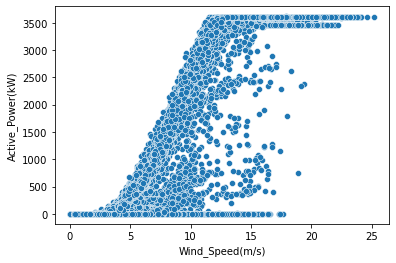

In [5]:
grafico_real = sns.scatterplot(data=turbina, x=turbina['Wind_Speed(m/s)'], y=turbina['Active_Power(kW)'])

## Plotando os dados do gráfico - Teórico

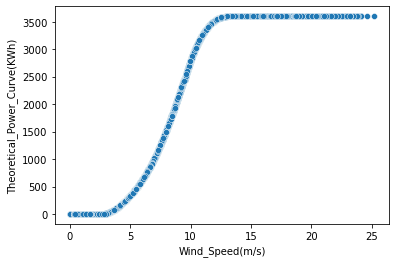

In [6]:
grafico_teorico = sns.scatterplot(data=turbina, x=turbina['Wind_Speed(m/s)'] , y=turbina['Theoretical_Power_Curve(KWh)'])

## Criando limites aceitáveis

In [7]:
pot_real = turbina['Active_Power(kW)'].to_list()
pot_teorica = turbina['Theoretical_Power_Curve(KWh)'].to_list()
pot_max=[]
pot_min=[]
dentro_limite = []

for potencia in pot_teorica: 
    pot_max.append(potencia*1.05)
    pot_min.append(potencia*0.95)

for p, potencia in enumerate(pot_real):
    if potencia >= pot_min[p] and potencia <= pot_max[p]:
        dentro_limite.append('Dentro')
    elif potencia == 0: 
        dentro_limite.append('Zero')
    else:
        dentro_limite.append('Fora')

#print(len(pot_max),len(pot_min))

per_dentro = dentro_limite.count('Dentro')/len(dentro_limite)

print(f'{round(per_dentro * 100, 2)}%')

37.29%


## Adicionando lista "dentro_limite" ao dataframe

In [8]:
turbina['Within_limit'] = dentro_limite
turbina.head()

,Date/Time,Active_Power(kW),Wind_Speed(m/s),Theoretical_Power_Curve(KWh),Wind_Direction(°),Within_limit
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,Fora
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,Fora
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,Fora
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,Fora
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,Fora


## Plotando novamente o gráfico

<AxesSubplot:xlabel='Wind_Speed(m/s)', ylabel='Active_Power(kW)'>

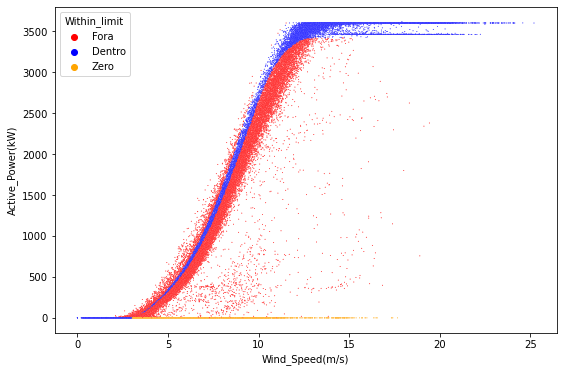

In [9]:
cores = {'Dentro': 'blue', 'Fora': 'red', 'Zero': 'orange'}
fig = plt.subplots(figsize=(9,6))
grafico_eficiencia = sns.scatterplot(data=turbina, x=turbina['Wind_Speed(m/s)'], y=turbina['Active_Power(kW)'], hue='Within_limit', s=1, palette=cores)
grafico_eficiencia

## Verificando a orientação do Vento

In [10]:
turbina['Direction'] = turbina['Wind_Direction(°)'].apply(lambda x: 'North_East' if (0 < x) & (x < 90) else 
                                                                    'North_West' if (90 < x) & (x < 180) else
                                                                    'South_West' if (180 < x) & (x < 270) else
                                                                    'South_East' if (270 < x) & (x < 360) else
                                                                    'North' if x == 90 else
                                                                    'South' if x == 270 else
                                                                    'East' if x == 0 else 'West')

<AxesSubplot:xlabel='Wind_Speed(m/s)', ylabel='Active_Power(kW)'>

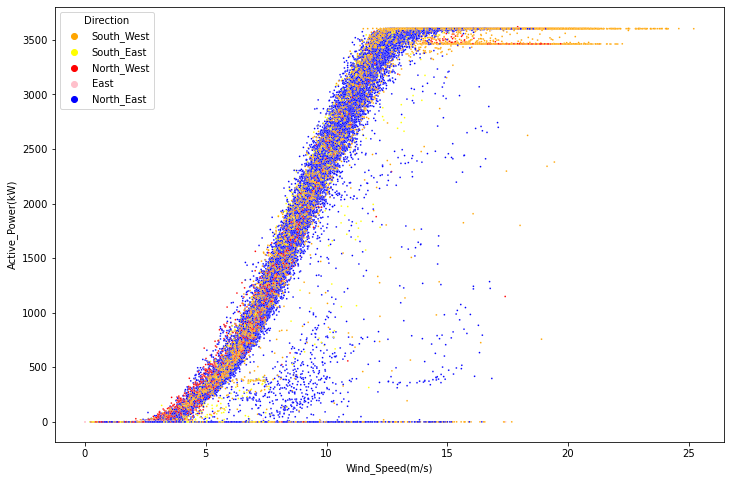

In [11]:
cores = {'North_East': 'blue', 'North_West': 'red', 'South_West': 'orange', 'South_East': 'yellow', 'North': 'green', 'South': 'cyan', 'East': 'pink', 'West': 'brown'}
fig = plt.subplots(figsize=(12,8))
grafico_eficiencia = sns.scatterplot(data=turbina, x=turbina['Wind_Speed(m/s)'], y=turbina['Active_Power(kW)'], hue='Direction', s=3, palette=cores)
grafico_eficiencia